| **Inicio** | **atrás 8** | **Siguiente 10** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./08_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./10_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)|

# **9. Matemáticas para el aprendizaje automático: Cálculo multivariante**

## **9.1 Series de Taylor y linealización**

La serie de Taylor es un método para reexpresar funciones como series polinómicas. Este enfoque es la razón de ser del uso de aproximaciones lineales simples a funciones complicadas. En este módulo, derivaremos la expresión formal para la serie de Taylor univariante y discutiremos algunas consecuencias importantes de este resultado relevantes para el aprendizaje automático. Por último, discutiremos el caso multivariante y veremos cómo entran en juego el jacobiano y el hessiano.

### **9.1.1 Construir funciones aproximadas**

Construir funciones aproximadas es un concepto fundamental en matemáticas y ciencia de datos, especialmente útil en la aproximación de funciones complejas a través de modelos más simples. Este proceso se utiliza ampliamente en la interpolación, el ajuste de curvas, y el aprendizaje automático, especialmente en redes neuronales para modelar relaciones no lineales. Vamos a explorar cómo construir funciones aproximadas con ejemplos, visualizaciones y un script de Python.

**Métodos Comunes para Construir Funciones Aproximadas**

**Polinomios**: Ajustar un polinomio a los datos puede ser una forma efectiva de modelar relaciones complejas de manera simple. Métodos como la interpolación de Lagrange y los polinomios de Taylor son ejemplos comunes.

**Splines**: Los splines son funciones pieza por pieza (generalmente polinomios) que aseguran una transición suave en los puntos donde se unen. Son útiles para la interpolación de datos que requieren suavidad en las curvas resultantes.

**Aproximaciones de Fourier**: Utilizar series de Fourier para modelar funciones periódicas mediante la suma de senos y cosenos. Es ideal para señales periódicas en ingeniería y física.

**Aproximación por mínimos cuadrados**: Método para encontrar la función que minimiza las diferencias cuadradas entre los puntos de datos y la función misma, típicamente utilizado en regresión lineal y no lineal.

**Redes Neuronales**: Estas son herramientas poderosas para modelar funciones altamente no lineales y complejas. Aprenden la relación entre entradas y salidas a partir de datos y pueden aproximar casi cualquier función.

**Ejemplo Práctico: Aproximación de un Polinomio**

Supongamos que queremos ajustar un polinomio a un conjunto de datos que representan una relación no lineal. Utilizaremos el método de mínimos cuadrados para encontrar el mejor polinomio que aproxime los datos.

**Datos de Ejemplo**

Consideremos un conjunto de puntos que sabemos que provienen de la función $f(x) = \sin(x) + x^2$ con ruido añadido.

**Código Python para Ajuste Polinomial**

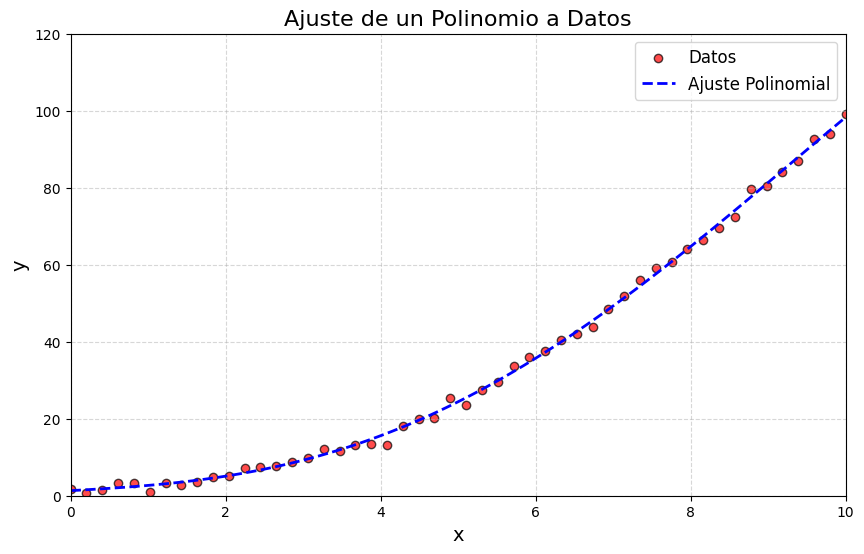

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = np.sin(x) + x**2 + np.random.normal(0, 1, size=x.shape)

# Ajustar un polinomio de grado 4
coefficients = np.polyfit(x, y, 4)
polynomial = np.poly1d(coefficients)

# Evaluar el polinomio
x_fit = np.linspace(0, 10, 100)
y_fit = polynomial(x_fit)

# Personalización de la gráfica
plt.figure(figsize=(10, 6))

# Datos originales
plt.scatter(x, y, color='red', label='Datos', marker='o', alpha=0.7, edgecolors='black')

# Ajuste polinomial
plt.plot(x_fit, y_fit, label='Ajuste Polinomial', color='blue', linestyle='--', linewidth=2)

# Etiquetas y título
plt.title('Ajuste de un Polinomio a Datos', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Establecer límites de los ejes
plt.xlim(0, 10)
plt.ylim(0, 120)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Visualización y Discusión**

El script anterior crea un gráfico donde los puntos de datos están marcados en rojo y la curva de ajuste en azul. El ajuste polinomial utiliza el método de mínimos cuadrados para minimizar el error entre los valores observados y los valores predichos por el modelo polinómico.

**Conclusión**

Construir funciones aproximadas es esencial en muchas áreas de investigación y aplicaciones industriales para simplificar modelos, reducir costos computacionales, y hacer predicciones sobre datos nuevos. Estos métodos proporcionan herramientas poderosas para ingenieros, científicos y analistas de datos para extraer y modelar la información contenida en los datos complejos. Desde polinomios hasta redes neuronales avanzadas, las técnicas de aproximación abarcan un amplio espectro de simplicidad y complejidad, adecuadas para diferentes tipos y tamaños de problemas de datos.

### **9.1.2 Serie Power**

La **serie de potencias** es una herramienta matemática fundamental en cálculo y análisis, utilizada para representar y estudiar funciones complejas. Una serie de potencias es una suma infinita de términos que tienen la forma $(a_n(x-c)^n)$, donde $(a_n)$ representa los coeficientes de la serie, $(x)$ es la variable, $(c)$ es el centro de la serie, y $(n)$ es un índice entero que empieza en cero y aumenta de uno en uno.

**Definición Formal**

Una serie de potencias alrededor de un punto $(c)$ se define como:

$f(x) = \sum_{n=0}^\infty a_n (x - c)^n$

donde:

- $(\sum)$ denota la suma.

- $(a_n)$ son los coeficientes de la serie.

- $(x)$ es la variable.

- $(c)$ es el centro de la serie, comúnmente cero.

- $(n)$ varía sobre los enteros no negativos.

**Convergencia de la Serie de Potencias**

La serie de potencias puede converger o diverger, dependiendo de los valores de $(x)$. El **radio de convergencia**, $(R)$, es el valor que limita dónde la serie de potencias converge:

- La serie converge absolutamente para todos los $(x)$ tales que $(|x - c| < R)$.

- La serie diverge para todos los $(x)$ tales que $(|x - c| > R)$.

- Para $(|x - c| = R)$, la convergencia puede variar y debe ser determinada caso por caso.

**Ejemplo: Serie de Potencias de $(e^x)$**

La función exponencial $(e^x)$ puede ser expresada como una serie de potencias centrada en $(c = 0)$:

$e^x = \sum_{n=0}^\infty \frac{x^n}{n!}$

Esta serie tiene un radio de convergencia infinito, lo que significa que converge para todos los valores reales de $(x)$.

**Código Python para Visualizar la Serie de Potencias de $(e^x)$**

Vamos a implementar y visualizar la serie de potencias de $(e^x)$ para los primeros $(N)$ términos y compararla con la función $(e^x)$ usando la librería de NumPy y Matplotlib.

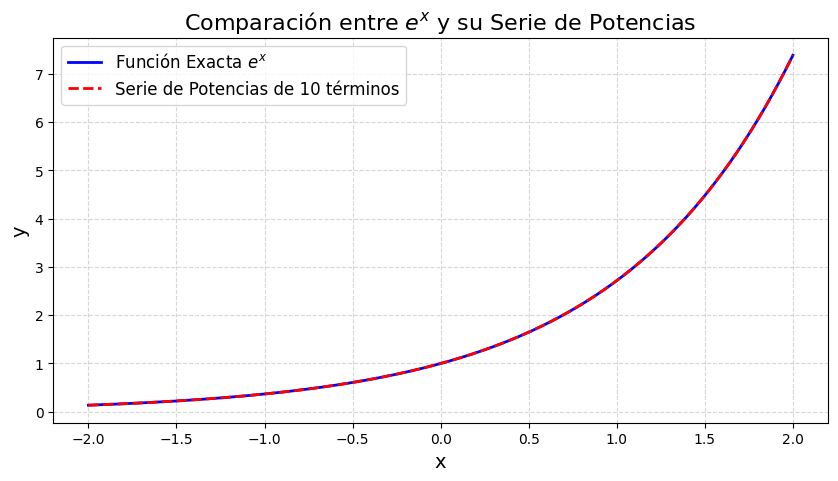

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la serie de potencias de e^x
def exp_power_series(x, terms=10):
    sum_series = 0
    for n in range(terms):
        sum_series += x**n / np.math.factorial(n)
    return sum_series

# Valores de x para el gráfico
x = np.linspace(-2, 2, 400)

# Calcular e^x usando la función de numpy para comparar
y_exact = np.exp(x)

# Calcular la aproximación de la serie de potencias
y_approx = exp_power_series(x, terms=10)

# Personalización de la gráfica
plt.figure(figsize=(10, 5))

# Función exacta
plt.plot(x, y_exact, label='Función Exacta $e^x$', color='blue', linewidth=2)

# Serie de potencias
plt.plot(x, y_approx, label='Serie de Potencias de 10 términos', color='red', linestyle='dashed', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Comparación entre $e^x$ y su Serie de Potencias', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Discusión**

Este gráfico muestra cómo la serie de potencias aproxima cada vez mejor a la función $(e^x)$ a medida que se incluyen más términos. Para este ejemplo, con 10 términos, la aproximación es bastante buena en el rango de $(x)$ mostrado.

**Conclusión**

Las series de potencias son extremadamente útiles en matemáticas aplicadas, física, ingeniería, y ciencias económicas, porque permiten manejar funciones complicadas mediante polinomios, que son más simples de diferenciar, integrar y evaluar numéricamente. La habilidad de aproximar funciones no solo es teóricamente valiosa, sino también práctica para algoritmos de cálculo y simulación en computadoras.

### **9.1.3 Derivación de series de potencias**

La **derivación de series de potencias** es un proceso que implica calcular la derivada de una serie de potencias término a término. Este método es fundamental en el análisis matemático porque permite manipular y estudiar funciones complejas de manera más sencilla, especialmente en contextos donde las funciones elementales no son fácilmente diferenciables de otras maneras.

**Concepto Básico**

Dada una serie de potencias para una función $f(x)$ centrada en $(c)$:

$f(x) = \sum_{n=0}^\infty a_n (x-c)^n$

la derivada de $f(x)$, denotada $f'(x)$, se calcula derivando cada término de la serie:

$f'(x) = \sum_{n=1}^\infty n \cdot a_n (x-c)^{n-1}$

**Propiedades Importantes**

**Linealidad**: La derivada de una serie de potencias conserva la linealidad, lo que significa que la derivada de una suma de series es la suma de sus derivadas.

**Radio de Convergencia**: El radio de convergencia para $f'(x)$ es el mismo que el de $f(x)$, aunque los extremos del intervalo de convergencia pueden comportarse de manera diferente y deben ser evaluados por separado.

**Ejemplo Práctico: Derivada de la Serie de $(e^x)$**

Consideremos la serie de potencias de la función exponencial $(e^x)$, centrada en $(c = 0)$:

$e^x = \sum_{n=0}^\infty \frac{x^n}{n!}$

**Derivada de la Serie**

La derivada de $(e^x)$ con respecto a $(x)$ se calcula como sigue:

$\frac{d}{dx} e^x = \frac{d}{dx} \left(\sum_{n=0}^\infty \frac{x^n}{n!}\right) = \sum_{n=1}^\infty \frac{n \cdot x^{n-1}}{n!} = \sum_{n=1}^\infty \frac{x^{n-1}}{(n-1)!} = \sum_{m=0}^\infty \frac{x^m}{m!} = e^x$

**Código Python y Visualización**

A continuación, se muestra un código en Python que visualiza tanto la función $(e^x)$ como su derivada, usando su representación de serie de potencias.

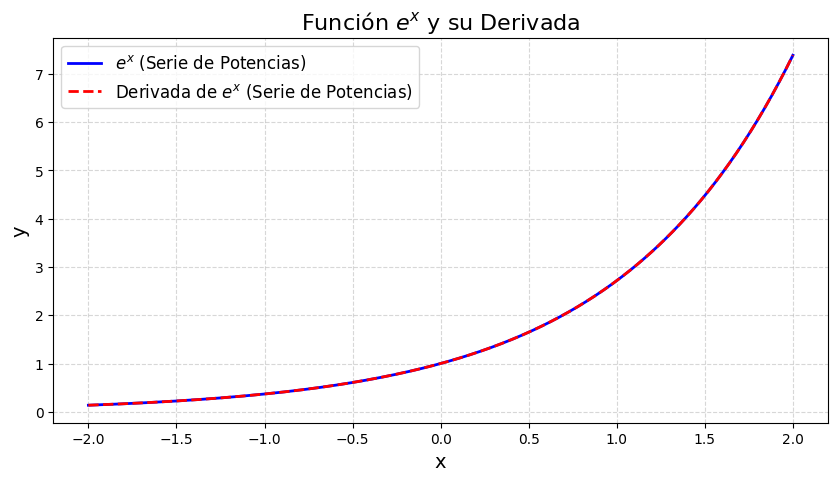

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función exponencial y su derivada usando series de potencias
def exp_series(x, terms=50):
    return sum([x**n / np.math.factorial(n) for n in range(terms)])

def derivative_exp_series(x, terms=50):
    return sum([n * x**(n-1) / np.math.factorial(n) for n in range(1, terms)])

# Generar puntos de datos
x_values = np.linspace(-2, 2, 400)
y_values = [exp_series(x) for x in x_values]
y_deriv_values = [derivative_exp_series(x) for x in x_values]

# Personalización de la gráfica
plt.figure(figsize=(10, 5))

# Función exponencial
plt.plot(x_values, y_values, label='$e^x$ (Serie de Potencias)', color='blue', linewidth=2)

# Derivada de la función exponencial
plt.plot(x_values, y_deriv_values, label="Derivada de $e^x$ (Serie de Potencias)", color='red', linestyle='dashed', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Función $e^x$ y su Derivada', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Conclusión**

La derivación de series de potencias es una herramienta poderosa que permite explorar propiedades de funciones difíciles de manejar con métodos de cálculo diferencial estándar. Al proporcionar un método para evaluar derivadas en formas de series, facilita análisis en puntos donde el cálculo directo sería complicado o imposible. Esto es particularmente útil en teoría de funciones, problemas de física teórica, y en aplicaciones de ingeniería donde las funciones se modelan en contextos amplios y variados.

### **9.1.4 Detalles de la serie Power**

Una **serie de potencias** es una representación de una función como suma infinita de términos, cada uno de los cuales es un producto de un coeficiente y una potencia de una variable. Las series de potencias son herramientas fundamentales en el análisis matemático, especialmente útiles para resolver ecuaciones diferenciales, evaluar integrales, y aproximar funciones que son difíciles de manejar con métodos estándar.

**Definición Formal**

Una serie de potencias alrededor de un punto $(c)$ en su forma más general se escribe como:

$f(x) = \sum_{n=0}^\infty a_n (x - c)^n$

donde:

- $(\sum)$ indica la suma infinita.

- $(a_n)$ son los coeficientes de la serie.

- $(x)$ es la variable.

- $(c)$ es el centro de la serie, alrededor del cual se expande la serie.

- $(n)$ es el índice que varía sobre todos los enteros no negativos.

**Convergencia**

La convergencia de una serie de potencias depende de la variable $(x)$ y del radio de convergencia $(R)$, que se puede determinar usando el criterio de la raíz o el criterio del cociente. Específicamente:

$R = \frac{1}{\limsup_{n \to \infty} |a_n|^{1/n}}$

- La serie converge absolutamente para todos $(|x - c| < R)$.

- La serie puede converger o diverger en $(|x - c| = R)$ y se debe examinar caso por caso.

- La serie diverge para $(|x - c| > R)$.

**Ejemplos Comunes de Series de Potencias**

**Serie de Taylor para $(e^x)$**

   $e^x = \sum_{n=0}^\infty \frac{x^n}{n!} \quad \text{(Radio de convergencia: } \infty\text{)}$

**Serie de Taylor para $(sin(x))$**

   $\sin(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)!} \quad \text{(Radio de convergencia: } \infty\text{)}$

**Serie de Taylor para $log(1+x)$**

   $\log(1+x) = \sum_{n=1}^\infty (-1)^{n-1} \frac{x^n}{n} \quad \text{(Radio de convergencia: } 1\text{)}$

**Código Python para Visualización**

A continuación, se proporciona un código Python que utiliza `matplotlib` para visualizar la serie de Taylor de la función $(e^x)$ y su convergencia.

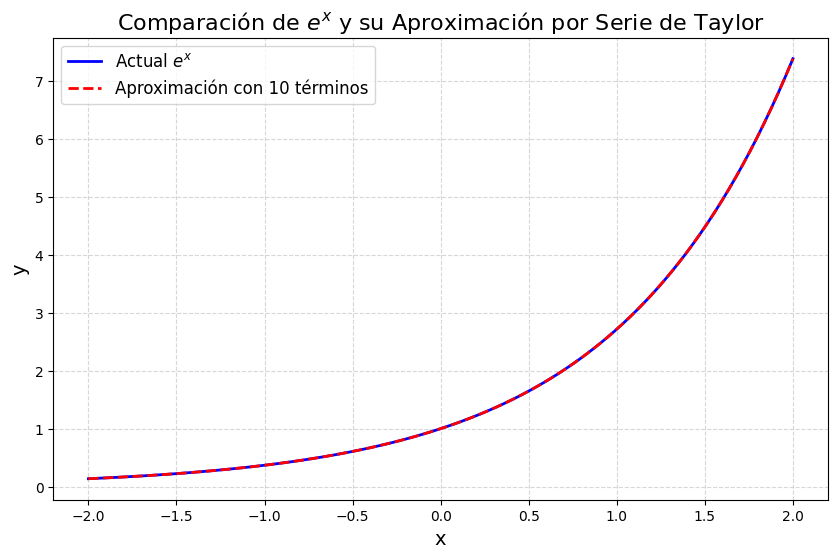

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_series_exponential(x, n_terms):
    return sum([x**i / np.math.factorial(i) for i in range(n_terms)])

x_values = np.linspace(-2, 2, 100)
y_values_actual = np.exp(x_values)
y_values_approx = [taylor_series_exponential(x, 10) for x in x_values]

plt.figure(figsize=(10, 6))

# Función exponencial real
plt.plot(x_values, y_values_actual, label='Actual $e^x$', color='blue', linewidth=2)

# Aproximación de la serie de Taylor con 10 términos
plt.plot(x_values, y_values_approx, label='Aproximación con 10 términos', color='red', linestyle='--', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Comparación de $e^x$ y su Aproximación por Serie de Taylor', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Conclusión**

Las series de potencias son fundamentales en matemáticas por su versatilidad y potencia para aproximar y representar una amplia gama de funciones. Permiten análisis detallados en puntos donde otras formas de evaluación directa serían complicadas, proporcionando herramientas esenciales para teóricos y aplicados en campos que van desde la física y la ingeniería hasta la economía y las ciencias de la computación.

### **9.1.5 Linealización**

La **linealización** es una técnica matemática utilizada para simplificar el análisis de sistemas no lineales aproximándolos con sistemas lineales en las proximidades de un punto de interés, generalmente un punto de equilibrio. Esta aproximación es fundamental en diversas disciplinas como la ingeniería, la economía y las ciencias naturales, porque permite utilizar herramientas analíticas y numéricas poderosas disponibles para sistemas lineales.

**Concepto Básico de Linealización**

Linealizar una función implica encontrar una aproximación lineal que describa con razonable precisión el comportamiento de la función cerca de un punto específico, generalmente un punto de equilibrio o un punto de operación. Matemáticamente, esto se realiza mediante la expansión de Taylor de primer orden de la función en torno a ese punto.

**Ejemplo Práctico: Linealización de una Función**

Supongamos que queremos linealizar la función $f(x) = e^x$ alrededor del punto $(x = 0)$.

**Expansión de Taylor**

La expansión de Taylor de $f(x)$ alrededor de $(x = 0)$ es:

$f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2}(x-a)^2 + \cdots$

Para linealizar, nos quedamos solo con el primer término después de $f(a)$, eliminando los términos de orden superior:

$f(x) \approx f(0) + f'(0)(x-0)$

Sabiendo que $f(x) = e^x$ y $f'(x) = e^x$, tenemos:

$f(0) = e^0 = 1, \quad f'(0) = e^0 = 1$

Por lo tanto, la linealización de $f(x)$ cerca de $(x = 0)$ es:

$f(x) \approx 1 + x$

**Código Python y Visualización**

A continuación, mostramos cómo visualizar la función original $(e^x)$ y su linealización en un gráfico, usando Python.

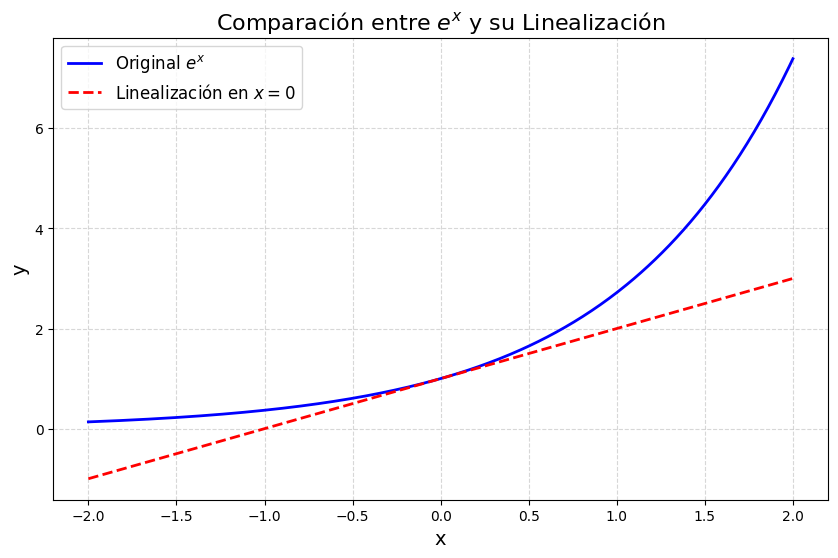

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y su linealización
def original_function(x):
    return np.exp(x)

def linear_approximation(x):
    return 1 + x

# Generar valores de x
x_values = np.linspace(-2, 2, 400)
original_values = original_function(x_values)
linear_values = linear_approximation(x_values)

# Visualizar
plt.figure(figsize=(10, 6))

# Función original
plt.plot(x_values, original_values, label='Original $e^x$', color='blue', linewidth=2)

# Linealización en x=0
plt.plot(x_values, linear_values, label='Linealización en $x=0$', color='red', linestyle='--', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Comparación entre $e^x$ y su Linealización', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Aplicaciones de la Linealización**

**Control de Sistemas**: En ingeniería de control, la linealización permite el diseño de controladores utilizando métodos desarrollados para sistemas lineales, incluso si el sistema real es no lineal.

**Análisis de Estabilidad**: La estabilidad de sistemas no lineales puede ser analizada mediante el estudio de la estabilidad del sistema linealizado.

**Simplificación de Modelos**: En economía, la linealización de modelos permite soluciones analíticas o numéricas simplificadas, lo que facilita la interpretación y la computación.

**Conclusión**

La linealización es una herramienta poderosa que ofrece una forma de manejar sistemas complejos y no lineales utilizando aproximaciones lineales. Aunque las aproximaciones lineales pueden perder precisión lejos del punto de linealización, ofrecen una simplicidad y accesibilidad analítica que es indispensable en muchas aplicaciones prácticas.

### **9.1.6 Taylor multivariante**

El **Polinomio de Taylor multivariante** es una generalización del polinomio de Taylor, que se utiliza para aproximar funciones de varias variables. Esta herramienta es muy útil en matemáticas aplicadas, física, ingeniería y ciencias económicas, permitiendo simplificar funciones complejas en torno a un punto específico mediante un polinomio que es mucho más fácil de manejar.

**Conceptos Básicos**

El polinomio de Taylor busca aproximar una función $f(x, y, ...)$ alrededor de un punto $(a, b, ...)$ utilizando un desarrollo en serie que involucra derivadas de varios órdenes de la función.

**Fórmula del Polinomio de Taylor Multivariante**

Para una función de dos variables $f(x, y)$, el polinomio de Taylor de orden $(n)$ alrededor del punto $(a, b)$ es:

$f(x, y) \approx \sum_{i=0}^n \sum_{j=0}^{n-i} \frac{1}{i!j!} \frac{\partial^{i+j} f}{\partial x^i \partial y^j} (a, b) (x-a)^i (y-b)^j$

donde $\frac{\partial^{i+j} f}{\partial x^i \partial y^j}$ es la derivada parcial de $(f)$ tomada $(i)$ veces con respecto a $(x)$ y $(j)$ veces con respecto a $(y)$, evaluada en $(a, b)$.

**Ejemplo Práctico: Aproximación de Taylor para $f(x, y) = e^{x+y}$**

Supongamos que queremos aproximar $f(x, y) = e^{x+y}$ alrededor del punto $(0, 0)$ usando un polinomio de Taylor de segundo orden.

**Derivadas Necesarias**

Para $f(x, y) = e^{x+y}$, tenemos:

- $f(x, y) = e^{x+y}$

- $\frac{\partial f}{\partial x} = e^{x+y}$, $\frac{\partial f}{\partial y} = e^{x+y}$

- $\frac{\partial^2 f}{\partial x^2} = e^{x+y}$, $\frac{\partial^2 f}{\partial y^2} = e^{x+y}$, $\frac{\partial^2 f}{\partial x \partial y} = e^{x+y}$

Evaluadas en $(0, 0)$, todas las derivadas son 1.

**Polinomio de Taylor de Segundo Orden**

$f(x, y) \approx 1 + x + y + \frac{1}{2}(x^2 + 2xy + y^2)$

**Código Python y Visualización**

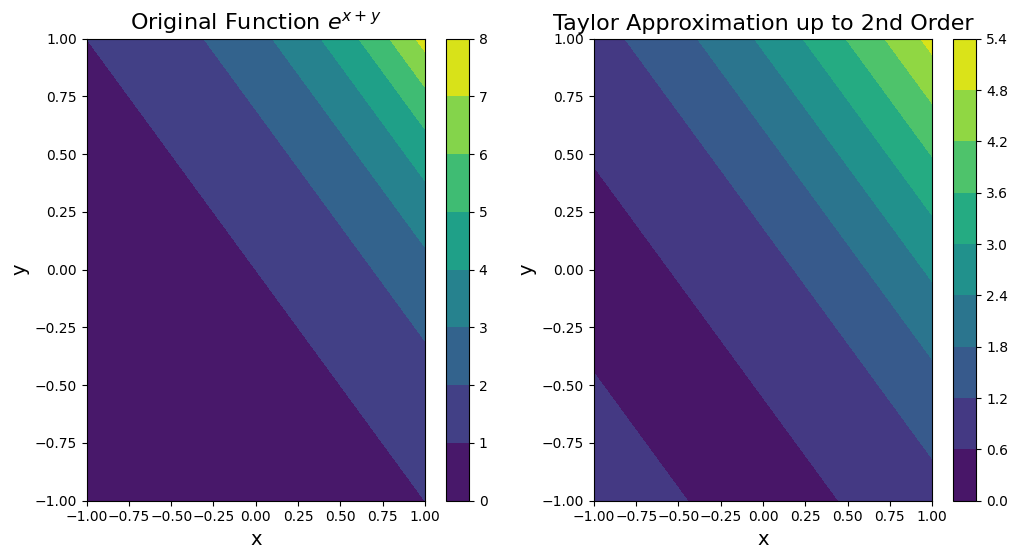

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def original_function(x, y):
    return np.exp(x + y)

def taylor_approximation(x, y):
    return 1 + x + y + 0.5*(x**2 + 2*x*y + y**2)

# Crear una malla de puntos
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z_original = original_function(X, Y)
Z_approx = taylor_approximation(X, Y)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Función original
cp = ax1.contourf(X, Y, Z_original, cmap='viridis')
fig.colorbar(cp, ax=ax1)
ax1.set_title('Original Function $e^{x+y}$', fontsize=16)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)

# Aproximación de Taylor hasta el segundo orden
cp2 = ax2.contourf(X, Y, Z_approx, cmap='viridis')
fig.colorbar(cp2, ax=ax2)
ax2.set_title('Taylor Approximation up to 2nd Order', fontsize=16)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)

plt.show()

**Conclusión**

El desarrollo de Taylor multivariante es una herramienta poderosa para aproximar funciones de varias variables cerca de un punto de interés. Permite transformaciones simplificadas de funciones complejas en análisis, optimización y solución de ecuaciones diferenciales. Esta metodología es indispensable en áreas técnicas y científicas donde las aproximaciones precisas y manejables son cruciales para el diseño y análisis de sistemas.

### **9.1.7 Funciones de correspondencia y aproximaciones**

Las **funciones de correspondencia y aproximaciones** son conceptos esenciales en matemáticas aplicadas y ciencias de la computación, especialmente importantes en el campo de la modelización matemática y el aprendizaje automático. Estos conceptos se refieren a la capacidad de crear funciones matemáticas que "correspondan" o se aproximen bien a un conjunto de datos o a una función teórica más compleja.

**Funciones de Correspondencia**

Una función de correspondencia es una función que intenta replicar la relación entre variables de entrada y salida en un conjunto de datos. El objetivo es encontrar una función $f(x)$ que, para cada entrada $(x)$, produzca una salida $(y)$ que esté cercana a la salida observada en los datos.

**Aproximaciones**

Las aproximaciones se utilizan para representar funciones complejas mediante funciones más simples. Las formas comunes de aproximaciones incluyen:

**Polinomios**: Utilizados para ajustar curvas a datos; por ejemplo, la regresión polinómica.

**Series de Potencias**: Como las series de Taylor o Fourier, que descomponen funciones complicadas en términos más manejables.

**Splines**: Polinomios pieza por pieza que se utilizan para crear ajustes suaves a lo largo de un rango de datos.

**Redes Neuronales**: Modelos computacionales que aprenden correspondencias complejas a partir de grandes volúmenes de datos.

**Ejemplo Práctico: Aproximación con Polinomios**

Imaginemos que queremos ajustar un modelo polinómico a un conjunto de datos que muestra una relación cuadrática.

**Datos de Ejemplo**

Supongamos que tenemos los siguientes puntos, que siguen aproximadamente una tendencia cuadrática: $(1, 2), (2, 5), (3, 10), (4, 17)$.

**Ajuste Polinómico**

Podríamos usar un polinomio de segundo grado (cuadrático) para ajustar estos datos. La forma general de un polinomio cuadrático es:

$y = ax^2 + bx + c$

**Código Python y Visualización**

Aquí está cómo podríamos realizar este ajuste y visualizarlo utilizando Python:

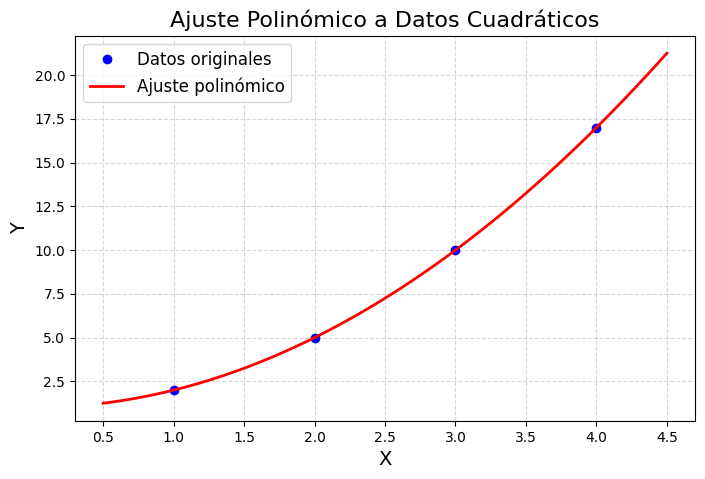

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x_data = np.array([1, 2, 3, 4])
y_data = np.array([2, 5, 10, 17])

# Ajustar un polinomio de segundo grado
coefficients = np.polyfit(x_data, y_data, 2)
polynomial = np.poly1d(coefficients)

# Generar puntos x para la visualización
x_fit = np.linspace(0.5, 4.5, 100)
y_fit = polynomial(x_fit)

# Personalización de la gráfica
plt.figure(figsize=(8, 5))

# Datos originales
plt.plot(x_data, y_data, 'o', label='Datos originales', color='blue')

# Ajuste polinómico
plt.plot(x_fit, y_fit, '-', label='Ajuste polinómico', color='red', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Ajuste Polinómico a Datos Cuadráticos', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Conclusión**

Las funciones de correspondencia y aproximaciones son herramientas poderosas en análisis numérico y ciencias aplicadas. Permiten simplificar el tratamiento de problemas complejos y proporcionan medios efectivos para la predicción y el análisis de sistemas. La capacidad de aproximarse y modelar precisamente las relaciones dentro de los datos es fundamental en muchos campos, desde la ingeniería hasta la economía y la biología. Estas técnicas no solo facilitan el entendimiento y la manipulación de funciones complicadas, sino que también ayudan en la creación de predicciones precisas y en el desarrollo de nuevas teorías y aplicaciones basadas en datos observados.

### **9.1.8 Aplicando la serie de Taylor**

La **Serie de Taylor** es una herramienta matemática poderosa que se utiliza para aproximar funciones complejas mediante polinomios, que son mucho más simples de manipular. Esta técnica es esencialmente un método para expandir una función en una serie infinita de términos, que se calculan a partir de las derivadas de la función en un punto específico, comúnmente denominado como "centro" de la serie.

**Fundamentos de la Serie de Taylor**

La serie de Taylor para una función $f(x)$ alrededor de un punto $(a)$ se define como:

$f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n$

donde:

- $f^{(n)}(a)$ es la $(n)$-ésima derivada de $(f)$ evaluada en $(a)$.

- $(n!)$ es el factorial de $(n)$.

- $(x-a)^n$ es la potencia $(n)$-ésima de la diferencia entre $(x)$ y $(a)$.

**Ejemplo Práctico: Aproximación de $(e^x)$**

Supongamos que queremos aproximar $(e^x)$ usando su serie de Taylor alrededor del punto $(x = 0)$ (serie de Maclaurin).

**Expansión de Maclaurin**

La serie de Taylor de $(e^x)$ en $(x = 0)$ es:

$e^x = \sum_{n=0}^\infty \frac{x^n}{n!}$

Podemos utilizar esta serie para calcular aproximaciones de $(e^x)$ para diferentes valores de $(x)$.

**Código Python para la Aproximación y Visualización**

Aquí mostramos cómo se puede implementar y visualizar esta aproximación en Python:

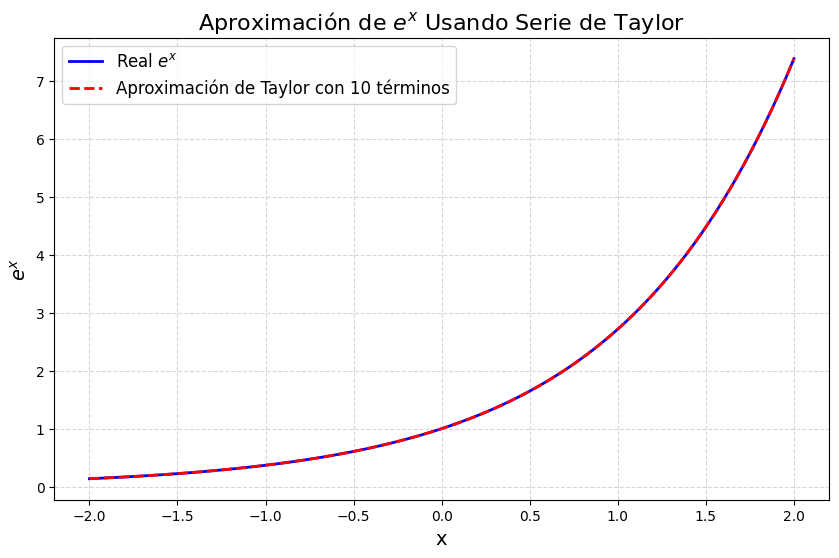

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_approximation_e_to_the_x(x, num_terms=10):
    """Calcula e^x usando los primeros 'num_terms' términos de la serie de Taylor centrada en 0."""
    approximation = 0
    for n in range(num_terms):
        approximation += x**n / np.math.factorial(n)
    return approximation

# Rango de valores x para graficar
x_values = np.linspace(-2, 2, 100)
# Aproximaciones y valor real
y_real = np.exp(x_values)
y_approximations = [taylor_approximation_e_to_the_x(x, num_terms=10) for x in x_values]

# Personalización de la gráfica
plt.figure(figsize=(10, 6))

# Función real e^x
plt.plot(x_values, y_real, label='Real $e^x$', color='blue', linewidth=2)

# Aproximación de Taylor con 10 términos
plt.plot(x_values, y_approximations, label='Aproximación de Taylor con 10 términos', color='red', linestyle='--', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Aproximación de $e^x$ Usando Serie de Taylor', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('$e^x$', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la figura
plt.show()

**Aplicaciones de las Series de Taylor**

**Análisis Numérico**: Las series de Taylor son fundamentales para desarrollar métodos numéricos para la integración y diferenciación, y para resolver ecuaciones diferenciales.

**Física e Ingeniería**: Se utilizan para modelar comportamientos físicos en situaciones donde las funciones exactas son demasiado complicadas o desconocidas.

**Economía**: En economía, se aplican para linealizar modelos económicos no lineales y realizar análisis de equilibrio.

**Conclusión**

La serie de Taylor es una herramienta extremadamente útil para aproximar funciones complejas con un alto grado de precisión dentro de un rango específico alrededor de un punto dado. Al permitir la manipulación algebraica simple de funciones que de otra manera serían intratables, la serie de Taylor facilita el análisis y la solución de problemas en múltiples disciplinas científicas y técnicas.

### **9.1.9 Series de Taylor - Casos especiales**

Las **Series de Taylor** son una herramienta matemática poderosa para aproximar funciones a través de polinomios. Aunque ya hemos discutido las series de Taylor en un contexto general, existen varios "casos especiales" que son particularmente útiles en ciertas aplicaciones prácticas y teóricas. Estos casos especiales incluyen las series de Maclaurin, así como las series de Taylor centradas en puntos distintos de cero, y pueden incluir funciones con características únicas que afectan su convergencia y aplicabilidad.

**Serie de Maclaurin**

Un caso especial importante de la serie de Taylor es la **serie de Maclaurin**, que es simplemente una serie de Taylor centrada en $(c = 0)$. La serie de Maclaurin de una función $f(x)$ se expresa como:

$f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(0)}{n!} x^n$

**Ejemplo con $(e^x)$**

Como ya se mencionó en una respuesta anterior, la serie de Maclaurin para $(e^x)$ es:

$e^x = \sum_{n=0}^\infty \frac{x^n}{n!}$

que tiene un radio de convergencia infinito, significando que converge para todo $(x)$.

**Funciones Trigonométricas**

Las funciones trigonométricas, como $\sin(x)$ y $\cos(x)$, también tienen series de Taylor y Maclaurin bien conocidas.

**Serie de Maclaurin para $(\sin(x))$**

$\sin(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$

**Serie de Maclaurin para $(\cos(x))$**

$\cos(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n}}{(2n)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots$

Estas series también tienen radios de convergencia infinitos.

**Código Python y Visualización**

Aquí proporcionamos un ejemplo de código Python para visualizar las series de Maclaurin de $\sin(x)$ y $\cos(x)$.

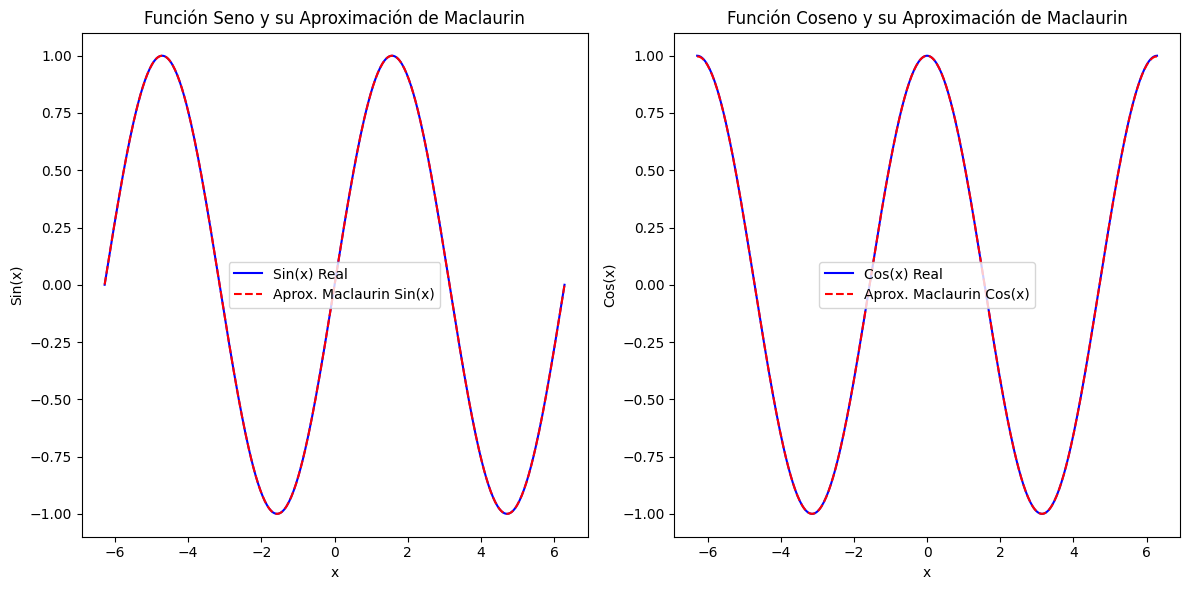

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def maclaurin_sin(x, terms=10):
    sin_approx = 0
    for n in range(terms):
        sin_approx += ((-1)**n * x**(2*n+1)) / np.math.factorial(2*n+1)
    return sin_approx

def maclaurin_cos(x, terms=10):
    cos_approx = 0
    for n in range(terms):
        cos_approx += ((-1)**n * x**(2*n)) / np.math.factorial(2*n)
    return cos_approx

# Rango de valores x
x = np.linspace(-2*np.pi, 2*np.pi, 400)

# Generar valores
y_sin = np.sin(x)
y_cos = np.cos(x)
y_sin_approx = maclaurin_sin(x, terms=10)
y_cos_approx = maclaurin_cos(x, terms=10)

# Personalización de la gráfica
plt.figure(figsize=(12, 6))

# Gráfico del seno y su aproximación de Maclaurin
plt.subplot(121)
plt.plot(x, y_sin, label='Sin(x) Real', color='blue')
plt.plot(x, y_sin_approx, '--', label='Aprox. Maclaurin Sin(x)', color='red')
plt.title('Función Seno y su Aproximación de Maclaurin')
plt.xlabel('x')
plt.ylabel('Sin(x)')
plt.legend()

# Gráfico del coseno y su aproximación de Maclaurin
plt.subplot(122)
plt.plot(x, y_cos, label='Cos(x) Real', color='blue')
plt.plot(x, y_cos_approx, '--', label='Aprox. Maclaurin Cos(x)', color='red')
plt.title('Función Coseno y su Aproximación de Maclaurin')
plt.xlabel('x')
plt.ylabel('Cos(x)')
plt.legend()

plt.tight_layout()
plt.show()

**Conclusión**

Las series de Taylor, incluidos sus casos especiales como las series de Maclaurin, son herramientas esenciales para la aproximación de funciones en matemáticas y ciencias aplicadas. Permiten simplificar el análisis de funciones complicadas y facilitan el cálculo numérico y simbólico en diversas aplicaciones prácticas. Además, son fundamentales para el estudio del comportamiento local de funciones en torno a puntos específicos, lo que es crucial en disciplinas como la física teórica, la ingeniería y más allá.

### **9.1.10 serie de Taylor 2D**

La **serie de Taylor 2D** se refiere a la expansión de Taylor para funciones de dos variables. Esta generalización permite aproximar funciones multivariables cerca de un punto dado, utilizando polinomios de varias variables. Es una herramienta valiosa en campos como la física, la ingeniería y la economía, donde se requiere simplificar y estudiar el comportamiento local de funciones complicadas.

**Conceptos Básicos de la Serie de Taylor 2D**

Para una función $f(x, y)$, la serie de Taylor alrededor de un punto $(a, b)$ en el plano xy se expresa como:

$f(x, y) = \sum_{n=0}^\infty \sum_{k=0}^n \frac{(x-a)^k (y-b)^{n-k}}{k!(n-k)!} \frac{\partial^n f}{\partial x^k \partial y^{n-k}} (a, b)$

donde $\frac{\partial^n f}{\partial x^k \partial y^{n-k}}$ son las derivadas parciales mixtas de $(f)$, evaluadas en el punto $(a, b)$.

**Ejemplo Práctico: Aproximación de Taylor 2D para $f(x, y) = e^{x+y}$**

Vamos a calcular y visualizar la aproximación de Taylor de segundo orden para la función $f(x, y) = e^{x+y}$ en torno al punto $(0, 0)$.

**Derivadas Necesarias**

Para $f(x, y) = e^{x+y}$, tenemos:

- $f(x, y) = e^{x+y}$

- Derivadas de primer orden: $\frac{\partial f}{\partial x} = e^{x+y}$, $\frac{\partial f}{\partial y} = e^{x+y}$

- Derivadas de segundo orden: $\frac{\partial^2 f}{\partial x^2} = e^{x+y}$, $\frac{\partial^2 f}{\partial y^2} = e^{x+y}$, $\frac{\partial^2 f}{\partial x \partial y} = e^{x+y}$

Evaluadas en $(0, 0)$, todas las derivadas son 1.

**Serie de Taylor de Segundo Orden**

La expansión de Taylor hasta el segundo orden es:

$f(x, y) \approx 1 + x + y + \frac{1}{2} x^2 + xy + \frac{1}{2} y^2$

**Código Python para Visualización**

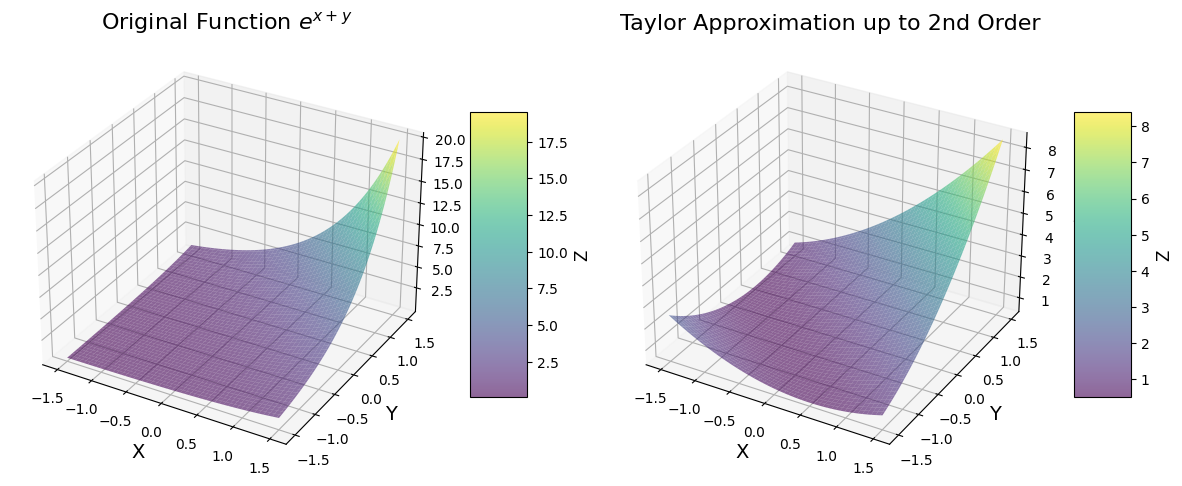

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def original_function(x, y):
    return np.exp(x + y)

def taylor_approximation_2d(x, y):
    return 1 + x + y + 0.5*x**2 + x*y + 0.5*y**2

# Crear una malla de puntos en el rango [-1.5, 1.5] para x y y
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z_original = original_function(X, Y)
Z_approx = taylor_approximation_2d(X, Y)

# Personalización de las gráficas 3D
fig = plt.figure(figsize=(12, 6))

# Gráfico de la función original
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, Z_original, cmap='viridis', alpha=0.6)
ax1.set_title('Original Function $e^{x+y}$', fontsize=16)
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax1.set_zlabel('Z', fontsize=14)

# Gráfico de la aproximación de Taylor hasta el segundo orden
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z_approx, cmap='viridis', alpha=0.6)
ax2.set_title('Taylor Approximation up to 2nd Order', fontsize=16)
ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_zlabel('Z', fontsize=14)

# Añadir barra de colores
cbar1 = fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
cbar1.set_label('Z', fontsize=12)

cbar2 = fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
cbar2.set_label('Z', fontsize=12)

plt.tight_layout()
plt.show()

**Conclusión**

La serie de Taylor 2D es una extensión poderosa de la serie de Taylor unidimensional, permitiendo a los investigadores y profesionales en diversas disciplinas analizar y simplificar funciones de múltiples variables. Al proporcionar una aproximación polinomial, facilita el cálculo y ofrece intuiciones valiosas sobre el comportamiento local de funciones complejas cerca de un punto de interés.

### **9.1.11 Evaluación de la serie Taylor**

La **evaluación de la serie de Taylor** implica calcular la suma de la serie de Taylor de una función hasta un cierto número de términos para aproximar la función original. Este proceso es fundamental en análisis matemático y tiene aplicaciones prácticas en física, ingeniería, economía y más, donde se utilizan funciones complejas que son difíciles de manejar directamente.

**Conceptos Básicos**

La serie de Taylor de una función $f(x)$ alrededor de un punto $(a)$ se define como:

$f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n$

donde $f^{(n)}(a)$ es la $(n)$-ésima derivada de $(f)$ evaluada en $(a)$, y $(n!)$ es el factorial de $(n)$.

**Ejemplo Práctico: Evaluación de la Serie de Taylor para $\cos(x)$**

Vamos a evaluar la serie de Taylor para la función $\cos(x)$ alrededor de $(x=0)$ (serie de Maclaurin) y comparar la aproximación con la función real.

**Serie de Maclaurin para $\cos(x)$**

La serie de Maclaurin para $\cos(x)$ es:

$\cos(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n}}{(2n)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots$

**Código Python para Evaluación y Visualización**

Vamos a implementar esta serie y visualizar cómo la aproximación mejora a medida que incluimos más términos.

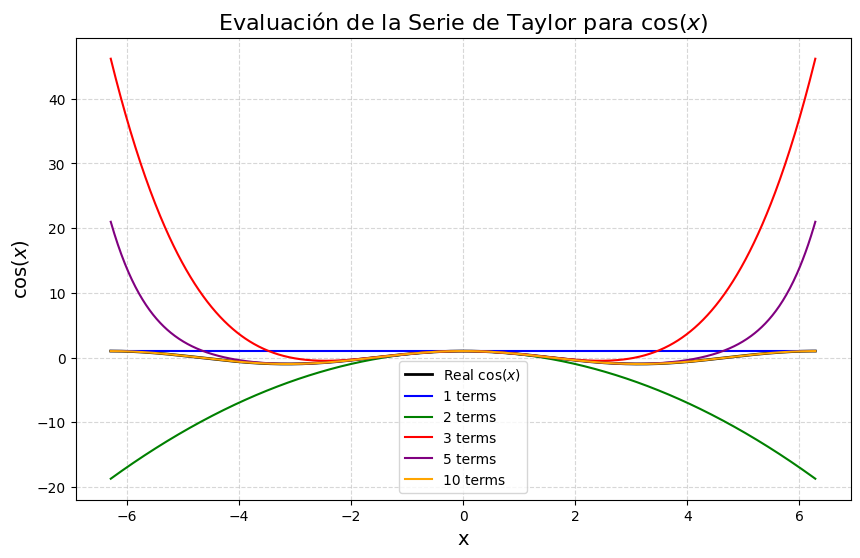

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_cos(x, terms=5):
    """Calcula la aproximación de cos(x) usando los primeros 'terms' términos de la serie de Maclaurin."""
    approximation = 0
    for n in range(terms):
        approximation += ((-1)**n * x**(2*n)) / np.math.factorial(2*n)
    return approximation

# Rango de valores x para graficar
x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_values_real = np.cos(x_values)

# Aproximaciones para diferentes números de términos
terms = [1, 2, 3, 5, 10]
plt.figure(figsize=(10, 6))

# Función real cos(x)
plt.plot(x_values, y_values_real, label='Real $\cos(x)$', linewidth=2, color='black')

# Aproximaciones con diferentes números de términos
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, num_terms in enumerate(terms):
    y_values_approx = [taylor_cos(x, terms=num_terms) for x in x_values]
    plt.plot(x_values, y_values_approx, label=f'{num_terms} terms', color=colors[i])

# Personalización de la gráfica
plt.title('Evaluación de la Serie de Taylor para $\cos(x)$', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('$\cos(x)$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Discusión**

En el gráfico resultante, se observa que a medida que se incrementa el número de términos en la serie, la aproximación se vuelve cada vez más precisa en un rango más amplio de $(x)$. Con pocos términos, la aproximación es buena solo cerca de $(x=0)$. Con más términos, la validez de la aproximación se extiende a intervalos más grandes.

**Conclusión**

La evaluación de la serie de Taylor es una técnica crítica en el cálculo para aproximar funciones complejas. Es particularmente útil cuando la función original es difícil de integrar, derivar o evaluar. La serie de Taylor permite transformaciones simplificadas y proporciona una poderosa herramienta para la predicción y análisis en ciencia e ingeniería. Esta metodología es clave para desarrollar soluciones numéricas y analíticas en diversas aplicaciones prácticas.

### **9.1.12 Visualización de la serie Taylor**

La **visualización de la serie de Taylor** es una forma poderosa de entender cómo las aproximaciones polinomiales de la serie de Taylor convergen a la función original a medida que se incluyen más términos. Este enfoque no solo mejora la intuición sobre el comportamiento de las funciones y sus aproximaciones sino que también es una herramienta didáctica excelente en la enseñanza del cálculo y el análisis matemático.

**Concepto de la Serie de Taylor**

La serie de Taylor de una función $f(x)$ alrededor de un punto $(a)$ se expresa como:

$f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n$

donde $f^{(n)}(a)$ es la $(n)$-ésima derivada de $(f)$ evaluada en $(a)$, y $(n!)$ es el factorial de $(n)$.

**Ejemplo Práctico: Visualización de la Serie de Taylor para $\sin(x)$**

Consideremos la serie de Taylor para $\sin(x)$ centrada en $(x = 0)$ (también conocida como serie de Maclaurin para $\sin(x)$:

$\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$

**Visualización en Python**

Vamos a visualizar cómo la adición de términos afecta la aproximación de $\sin(x)$ utilizando Python:

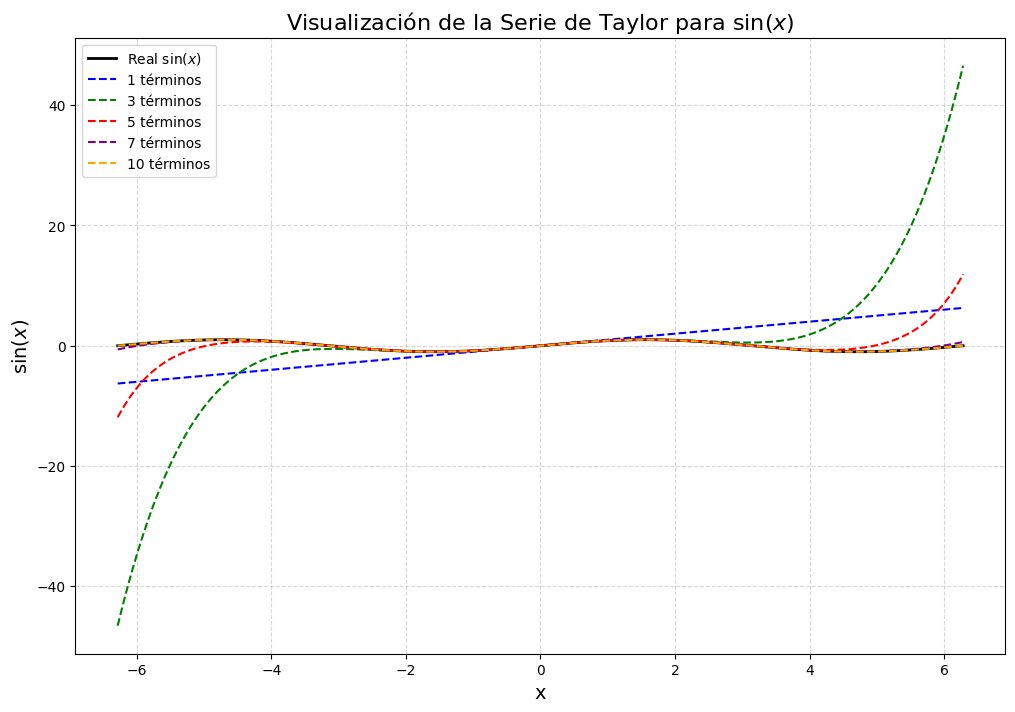

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_sin(x, terms=5):
    """Calcula la aproximación de sin(x) usando los primeros 'terms' términos de la serie de Maclaurin."""
    sin_approx = 0
    for n in range(terms):
        sin_approx += ((-1)**n * x**(2*n+1)) / np.math.factorial(2*n+1)
    return sin_approx

# Rango de valores x para graficar
x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_values_real = np.sin(x_values)

# Aproximaciones para diferentes números de términos
terms = [1, 3, 5, 7, 10]  # Número de términos en la serie de Taylor
plt.figure(figsize=(12, 8))

# Función real sin(x)
plt.plot(x_values, y_values_real, label='Real $\sin(x)$', linewidth=2, color='black')

# Aproximaciones con diferentes números de términos
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, num_terms in enumerate(terms):
    y_values_approx = [taylor_sin(x, terms=num_terms) for x in x_values]
    plt.plot(x_values, y_values_approx, label=f'{num_terms} términos', color=colors[i], linestyle='--')

# Personalización de la gráfica
plt.title('Visualización de la Serie de Taylor para $\sin(x)$', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('$\sin(x)$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Discusión**

En el gráfico generado, cada línea representa la serie de Taylor para $\sin(x)$ con un número creciente de términos. Esto muestra claramente cómo la aproximación se vuelve más precisa y abarca un rango más amplio de $(x)$ a medida que se incluyen más términos. La convergencia es particularmente buena cerca del origen, y la precisión disminuye a medida que nos alejamos del centro de expansión.

**Conclusiones**

Visualizar las series de Taylor es una excelente manera de entender la convergencia y la precisión de estas aproximaciones. A través de este método, podemos apreciar cómo cada término adicional ayuda a modelar la función original más fielmente, especialmente cerca del punto de expansión. Esta técnica no solo es útil en contextos educativos sino también en investigaciones científicas y desarrollos de ingeniería donde las aproximaciones precisas son cruciales.

| **Inicio** | **atrás 8** | **Siguiente 10** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./08_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./10_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)|